In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
ls data/

cookie_all_basic.csv  id_all_ip.csv        property_category.csv
dev_test_basic.csv    id_all_property.csv  sampleSubmission.csv
dev_train_basic.csv   ipagg_all.csv        stale/


In [3]:
import pandas as pd
from itertools import groupby, count
_figsize = (13.5,8)

In [4]:
cookie_all_basic = pd.read_csv('data/cookie_all_basic.csv')
dev_train_basic = pd.read_csv('data/dev_train_basic.csv')
dev_test_basic = pd.read_csv('data/dev_test_basic.csv')
ipagg_all = pd.read_csv('data/ipagg_all.csv')
sampleSubmission = pd.read_csv('data/sampleSubmission.csv')
#  = pd.read_csv('')

In [5]:
property_category = pd.read_csv('data/property_category.csv')
id_all_ip = pd.read_csv('data/id_all_ip.csv')
id_all_property = pd.read_csv('data/id_all_property.csv')

In [6]:
dev_all = pd.concat([dev_test_basic, dev_train_basic], ignore_index=True)
print dev_test_basic.shape[0], dev_train_basic.shape[0], dev_all.shape[0]

61156 142770 203926


In [7]:
# print "unique devices: \n%s " % ('\n'.join(["%d. %s" % (i, j) for i, j in enumerate(dev_all.device_type.unique())]))
# print "\nunique dev types: \n%s " % (["%d. %s" % (i, j) for i, j in enumerate(dev_all.device_os.unique())])
uniq_dev_types = dev_all.device_type.unique()
uniq_dev_os = dev_all.device_os.unique()
uniq_country = dev_all.country.unique()
uniq_drawbridge_handle_train =  dev_all.drawbridge_handle.unique()
print "unique device types: %s " % (len(np.delete(uniq_dev_types, np.where(uniq_dev_types == '-1'))))
print "unique device OS types: %s " % (len(np.delete(uniq_dev_os, np.where(uniq_dev_os == '-1'))))
print "unique device countries: %s " % (len(np.delete(uniq_country, np.where(uniq_country == '-1'))))
print "unique train drawbridge handles: %s " % (len(np.delete(uniq_drawbridge_handle_train, np.where(uniq_drawbridge_handle_train == -1))))

unique device types: 7 
unique device OS types: 88 
unique device countries: 148 
unique train drawbridge handles: 139419 


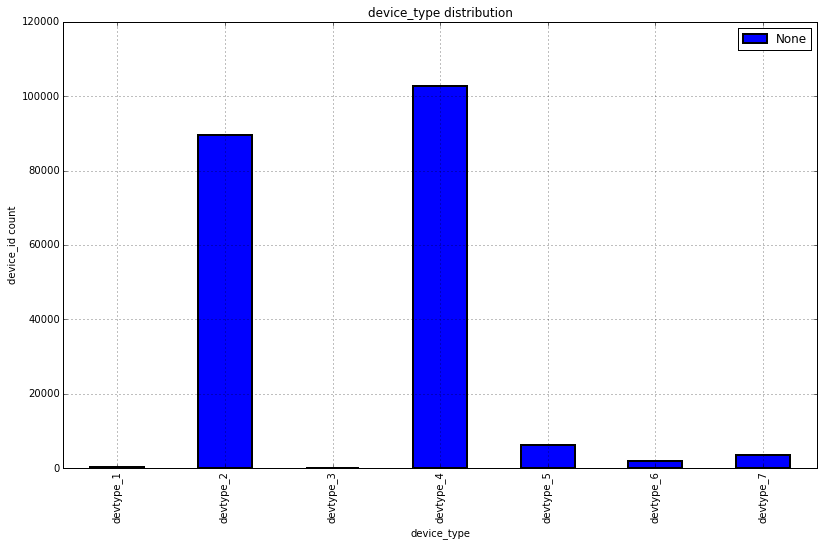

In [8]:
# def as_range(iterable):
#     l = list(iterable)
#     if len(l) > 1:
#         return (l[0], l[-1])
#     else:
#         return l[0]
    
# [as_range(g) for _, g in groupby(dev_all.drawbridge_handle, key=lambda n, c=count(): n-next(c))]

s = dev_all.groupby("device_type").agg(lambda x:len(x.unique()))
# s
s = s.drop(s.index[0]).reset_index()
ax = s.plot(x='device_type', y='device_id', 
            lw=2, title='device_type distribution', 
            figsize = _figsize, kind='bar')
ax.set_ylabel("device_id count")

In [14]:
# "anonymous_c1_1307" in dev_train_basic.anonymous_c1
dev_all

,drawbridge_handle,device_id,device_type,device_os,country,anonymous_c0,anonymous_c1,anonymous_c2,anonymous_5,anonymous_6,anonymous_7
0,-1,id_1,devtype_2,devos_72,country_146,1,-1,-1,52,1,204
1,-1,id_100002,devtype_4,devos_7,country_146,1,anonymous_c1_322,anonymous_c2_3059,7,1,149
2,-1,id_1000035,devtype_4,devos_68,country_146,-1,anonymous_c1_814,anonymous_c2_1918,17,106,201
3,-1,id_1000099,devtype_2,devos_159,country_146,0,anonymous_c1_736,-1,19,1,203
4,-1,id_1000294,devtype_4,devos_119,country_146,-1,anonymous_c1_261,anonymous_c2_17508,19,147,204
5,-1,id_1000305,devtype_4,devos_68,country_146,-1,anonymous_c1_144,anonymous_c2_29201,8,1,203
6,-1,id_1000310,devtype_2,devos_36,country_146,-1,anonymous_c1_510,anonymous_c2_15003,18,11,204
7,-1,id_1000414,devtype_2,devos_157,country_146,1,anonymous_c1_255,anonymous_c2_26303,16,1,202
8,-1,id_1000497,devtype_4,devos_114,country_146,-1,anonymous_c1_255,anonymous_c2_1927,16,18,204
9,-1,id_1000594,devtype_4,devos_68,country_146,-1,anonymous_c1_688,anonymous_c2_30854,4,1,188


In [15]:
ipagg_all

,ip_address,is_cellular_ip,ip_total_freq,ip_anonymous_c0,ip_anonymous_c1,ip_anonymous_c2
0,ip8352948,0,400000,52,5500,27
1,ip4596125,0,802,31,19,10
2,ip19351956,0,400000,52,3726,155
3,ip17464771,0,6577,47,20,17
4,ip14710657,0,5714,52,41,17
5,ip19924303,0,8568,52,23,22
6,ip1244536,0,624,17,13,7
7,ip8860399,0,68,22,34,0
8,ip18387504,0,1111,42,37,20
9,ip9845916,0,1517,27,16,14


In [9]:
cookie_all_basic

,drawbridge_handle,cookie_id,computer_os_type,computer_browser_version,country,anonymous_c0,anonymous_c1,anonymous_c2,anonymous_5,anonymous_6,anonymous_7
0,-1,id_10,computer_os_type_203,computer_browser_version_1158,country_146,1,anonymous_c1_1307,anonymous_c2_18778,15,1,204
1,handle_609762,id_100,computer_os_type_133,computer_browser_version_875,country_146,1,anonymous_c1_753,-1,41,1,204
2,handle_1622320,id_1000,computer_os_type_203,computer_browser_version_36,country_146,0,anonymous_c1_906,anonymous_c2_751,40,140,204
3,-1,id_10000,computer_os_type_203,computer_browser_version_36,country_146,1,anonymous_c1_255,anonymous_c2_2725,34,140,204
4,handle_1286628,id_100000,computer_os_type_203,computer_browser_version_875,country_146,0,anonymous_c1_255,anonymous_c2_235,52,134,204
5,-1,id_1000003,computer_os_type_200,computer_browser_version_683,country_146,0,anonymous_c1_983,-1,23,67,204
6,handle_226230,id_1000006,computer_os_type_203,computer_browser_version_1238,-1,1,-1,-1,1,183,183
7,-1,id_1000007,computer_os_type_133,computer_browser_version_36,country_177,-1,anonymous_c1_431,anonymous_c2_22023,7,141,197
8,handle_15216,id_1000008,computer_os_type_200,computer_browser_version_482,country_146,0,anonymous_c1_1179,anonymous_c2_2683,40,74,204
9,handle_1043549,id_1000009,computer_os_type_133,computer_browser_version_1158,country_146,0,anonymous_c1_1307,anonymous_c2_6720,11,161,203


In [11]:
property_category

,property_id,category_id
0,property_40678,category_82
1,property_40678,category_210
2,property_40678,category_331
3,property_40678,category_279
4,property_40678,category_164
5,property_40678,category_241
6,property_193795,category_196
7,property_193795,category_162
8,property_193795,category_55
9,property_193795,category_125


In [12]:
id_all_property

,device_or_cookie_id,device_or_cookie_indicator,property_id,unique_days_seeing_property_on_device_or_cookie_id
0,id_558314,1,property_66021,7
1,id_558314,1,property_24444,1
2,id_558314,1,property_285395,6
3,id_558314,1,property_267459,1
4,id_558314,1,property_197052,14
5,id_558314,1,property_132313,1
6,id_558314,1,property_110400,1
7,id_2402368,1,property_66021,1
8,id_2402368,1,property_197052,15
9,id_2402368,1,property_132313,3


In [13]:
id_all_ip

,device_or_cookie_id,device_or_cookie_indicator,ip,ip_freq_count,idxip_anonymous_c1,idxip_anonymous_c2,idxip_anonymous_c3,idxip_anonymous_c4,idxip_anonymous_c5
0,id_25644,1,ip1750664,18,0,1,1,0,1
1,id_25644,1,ip5400336,38,0,6,1,0,1
2,id_25644,1,ip5572833,8,0,8,1,0,1
3,id_25644,1,ip599211,24,0,24,1,0,1
4,id_25644,1,ip8273121,21,0,0,1,0,0
5,id_25644,1,ip13668503,7,0,0,1,0,0
6,id_25644,1,ip15664993,3,3,3,1,1,1
7,id_25644,1,ip17041094,15,0,13,1,1,1
8,id_25644,1,ip4742846,1,1,1,1,1,1
9,id_25644,1,ip14397385,52,0,48,1,0,1
